# Hitter

In [6]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [7]:
df_hitter_perf.columns,df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A',
        u'OBP_A', u'SLG_A', u'WAR_A', u'HR%_A', u'BB%_A', u'K%_A', u'BIPA_A',
        u'Spd_A', u'PSN_A', u'wOBA_A', u'wRC_A', u'wRAA_A', u'AVG_B', u'OBP_B',
        u'SLG_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B', u'BIPA_B', u'Spd_B',
        u'PSN_B', u'wOBA_B', u'wRC_B', u'wRAA_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'Spectators', u'TitleSponsors', u'Broadcasting',
        u'GDP', u'Clubs', u'FA_Pitcher', u'FA_Hitter', u'BirthYear', u'Age',
        u'Captain', u'NationalMember', u'Marriage', u'Surgery', u'Salary',
        u'Total', u'Period', u'Transfer', u'GoldenGlove', u'Rookie', u'AllStar',
        u'Interest', u'Inflation', u'Hometown', u'RewardPlayer',
        u'PreviousTeam', u'NewTeam', u'Position'],
       dtype='object'))

In [8]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Salary']

In [20]:
idx = dfy_hitter == '-'
df_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc, dfy_hitter], axis=1)
df_hitter = df_hitter.drop(df_hitter.index[idx])
df_hitter = sm.add_constant(df_hitter).astype(float)
df_hitter.index = np.arange(1,len(df_hitter)+1)
df_hitter.tail()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BB_A,K_A,BIPA_A,Spd_A,PSN_A,wOBA_A,wRC_A,wRAA_A,AVG_B,OBP_B,SLG_B,WAR_B,HR_B,BB_B,K_B,BIPA_B,Spd_B,PSN_B,wOBA_B,wRC_B,wRAA_B,Spectators,Broadcasting,GDP,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
119,1.0,0.307,0.386,0.402,3.64,0.62,11.1,8.6,0.331,4.1,4.20,0.354,67.5,2.1,0.310,0.389,0.440,3.24,1.41,11.5,10.5,0.330,4.8,7.47,0.374,75.9,6.4,8339577.0,560.0,1623840.304,10.0,6.0,8.0,33.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12.50
120,1.0,0.287,0.394,0.474,4.23,4.02,11.9,21.3,0.338,2.5,10.50,0.400,86.7,24.5,0.308,0.451,0.571,3.94,5.14,17.5,18.5,0.342,4.1,9.68,0.450,108.3,40.2,8339577.0,560.0,1623840.304,10.0,6.0,8.0,33.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,10.00
121,1.0,0.282,0.350,0.413,1.45,1.41,9.2,13.2,0.316,3.9,4.80,0.354,54.8,4.0,0.335,0.408,0.497,1.18,2.42,10.1,20.8,0.410,3.4,3.75,0.404,37.5,8.5,8339577.0,560.0,1623840.304,10.0,6.0,8.0,36.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.25
122,1.0,0.310,0.411,0.499,5.50,2.74,14.8,14.2,0.341,3.2,4.80,0.416,78.0,30.7,0.322,0.380,0.435,1.37,1.44,7.9,14.1,0.365,4.1,6.86,0.369,62.1,3.5,8339577.0,560.0,1623840.304,10.0,6.0,8.0,38.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0,7.00
123,1.0,0.328,0.408,0.520,5.33,3.03,11.0,13.5,0.362,5.6,12.59,0.404,98.8,31.4,0.332,0.403,0.480,1.66,2.36,10.6,10.4,0.351,2.3,3.33,0.400,74.9,15.5,8339577.0,560.0,1623840.304,10.0,6.0,8.0,38.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,8.0,7.50


In [21]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [22]:
df_hitter.describe()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BB_A,K_A,BIPA_A,Spd_A,PSN_A,wOBA_A,wRC_A,wRAA_A,AVG_B,OBP_B,SLG_B,WAR_B,HR_B,BB_B,K_B,BIPA_B,Spd_B,PSN_B,wOBA_B,wRC_B,wRAA_B,Spectators,Broadcasting,GDP,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
count,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,1.230000e+02,123.000000,1.230000e+02,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,1.0,0.307016,0.389797,0.484602,4.986585,3.116667,10.681301,13.911382,0.333407,4.572358,10.410244,0.389423,83.918699,23.888618,0.279707,0.363911,0.423610,2.381382,2.455935,10.465041,15.181301,0.312065,3.632520,4.789837,0.355821,55.220325,7.399187,5.246432e+06,249.794146,1.187548e+06,8.504065,4.317073,8.756098,34.406504,0.373984,0.682927,0.772358,0.455285,0.284553,1.593496,0.105691,4.203252,6.902114
std,0.0,0.029016,0.037330,0.086901,2.074706,1.932571,3.237342,4.108392,0.027684,1.649903,7.767673,0.044775,27.100688,20.230249,0.039037,0.042663,0.092802,1.751181,1.825211,3.220044,4.981496,0.040775,1.558504,4.405779,0.049982,30.136936,16.934171,1.975843e+06,176.843872,3.024356e+05,0.761513,2.744046,3.118799,2.566612,0.485838,0.467239,0.421025,0.500033,0.453047,1.970426,0.308699,3.064764,5.025729
min,1.0,0.236000,0.298000,0.321000,1.000000,0.000000,5.100000,5.500000,0.260000,1.300000,0.000000,0.282000,29.300000,-14.600000,0.157000,0.261000,0.196000,-0.540000,0.000000,2.400000,7.500000,0.200000,0.100000,0.000000,0.246000,0.400000,-32.100000,2.331978e+06,46.000000,5.768730e+05,8.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,1.0,0.289000,0.366500,0.419000,3.430000,1.590000,8.300000,11.000000,0.320000,3.150000,4.030000,0.359000,67.750000,8.400000,0.257000,0.338000,0.367000,1.080000,1.020000,8.150000,11.400000,0.289500,2.700000,1.690000,0.324000,35.150000,-2.950000,3.304234e+06,90.000000,9.197970e+05,8.000000,2.000000,7.000000,33.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.800000
50%,1.0,0.308000,0.384000,0.475000,5.290000,2.980000,10.300000,13.500000,0.333000,4.400000,9.330000,0.388000,82.700000,21.500000,0.284000,0.366000,0.418000,2.150000,2.250000,10.000000,14.200000,0.310000,3.500000,3.650000,0.355000,56.500000,4.900000,5.928626e+06,212.000000,1.265308e+06,8.000000,3.000000,9.000000,34.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000
75%,1.0,0.324500,0.410000,0.536000,5.995000,4.250000,12.500000,16.300000,0.352500,5.750000,14.520000,0.416000,99.100000,36.200000,0.307000,0.391000,0.480000,3.390000,3.560000,12.550000,17.900000,0.339500,4.500000,6.915000,0.389000,75.050000,15.700000,6.810028e+06,302.000000,1.429445e+06,9.000000,7.000000,12.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,7.000000,8.750000
max,1.0,0.393000,0.478000,0.720000,11.770000,8.820000,20.600000,28.100000,0.402000,8.300000,32.730000,0.498000,154.700000,80.700000,0.376000,0.464000,0.789000,8.390000,9.400000,18.700000,28.700000,0.442000,7.800000,21.330000,0.480000,154.700000,68.100000,8.339577e+06,560.000000,1.623840e+06,10.000000,9.000000,12.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,12.000000,25.000000


- wRAA_A, WAR_B, wRAA_B -> 음수값 존재

# 1. OLS

In [23]:
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression().fit(df_hitter.ix[:,:-1], df_hitter.ix[:,-1])
model_sm = sm.OLS(df_hitter.ix[:,-1], df_hitter.ix[:,:-1])
result_sm = model_sm.fit()

In [24]:
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     7.525
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           8.49e-15
Time:                        03:41:48   Log-Likelihood:                -276.03
No. Observations:                 123   AIC:                             636.1
Df Residuals:                      81   BIC:                             754.2
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3745     26.911      0.

# 2. Pairplot

dff = pd.concat([df_hitter.ix[:,1:14], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

dff = pd.concat([df_hitter.ix[:,14:27], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

dff = pd.concat([df_hitter.ix[:,27:-1], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

### 히스토그램 관찰 결과
SLG_A, WAR_A, HR%_A, BB%_A, K%_A, Spd_A, PSN_A, wRAA_A, SLG_B, WAR_B, HR%_B, K%_B, PSN_B, WRC_B, wRAA_B, Spectators, Broadcasting, GDP, GoldenGlove, Allstar 
이 변수들을 로그 변환 해주기로 함

# 3.  로그변환 

In [25]:
#로그변환
df_hitter1 = df_hitter.copy()

#df_hitter1["LogHR_A"]= np.log(df_hitter1["HR_A"]+1)
df_hitter1["LogBB_A"]= np.log(df_hitter1["BB_A"]+0)
df_hitter1["LogK_A"]= np.log(df_hitter1["K_A"]+0)
#df_hitter1["LogSpd_A"]= np.log(df_hitter1["Spd_A"]+0)
df_hitter1["LogPSN_A"]= np.log(df_hitter1["PSN_A"]+1)
df_hitter1["LogwRAA_A"]= np.log(df_hitter1["wRAA_A"]+15.6)   #  마이너스

df_hitter1["LogSLG_B"]= np.log(df_hitter1["SLG_B"]+0.804)
df_hitter1["LogWAR_B"]= np.log(df_hitter1["WAR_B"]+1.54)   # 마이너스 
df_hitter1["LogPSN_B"]= np.log(df_hitter1["PSN_B"]+1)    # 질문
df_hitter1["LogHR_B"]= np.log(df_hitter1["HR_B"]+ 1)
df_hitter1["LogK_B"]= np.log(df_hitter1["K_B"]+0)
df_hitter1["LogwRAA_B"]= np.log(df_hitter1["wRAA_B"]+70)   # 마이너스

df_hitter1["LogSpectators"]= np.log(df_hitter1["Spectators"]+0)   # etc 변수들 질문
df_hitter1["LogBroadcasting"]= np.log(df_hitter1["Broadcasting"]+0)
df_hitter1["LogGDP"]= np.log(df_hitter1["GDP"]+0)
#df_hitter1["LogGoldenGlove"]= np.log(df_hitter1["GoldenGlove"]+1)
df_hitter1["LogAllStar"]= np.log(df_hitter1["AllStar"]+1)

df_hitter1["LogSalary"]= np.log(df_hitter1["Salary"]+ 1)

#del df_hitter1["HR_A"]
del df_hitter1["BB_A"]
del df_hitter1["K_A"]
#del df_hitter1["Spd_A"]
del df_hitter1["PSN_A"]
del df_hitter1["wRAA_A"]

del df_hitter1["SLG_B"]
del df_hitter1["WAR_B"]
del df_hitter1["HR_B"]
del df_hitter1["PSN_B"]
del df_hitter1["K_B"]
del df_hitter1["wRAA_B"]

del df_hitter1["Spectators"]
del df_hitter1["Broadcasting"]
del df_hitter1["GDP"]
#del df_hitter1["GoldenGlove"]
del df_hitter1["AllStar"]

del df_hitter1["Salary"]

In [26]:
df_hitter1.tail()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BIPA_A,Spd_A,wOBA_A,wRC_A,AVG_B,OBP_B,BB_B,BIPA_B,Spd_B,wOBA_B,wRC_B,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,LogBB_A,LogK_A,LogPSN_A,LogwRAA_A,LogSLG_B,LogWAR_B,LogPSN_B,LogHR_B,LogK_B,LogwRAA_B,LogSpectators,LogBroadcasting,LogGDP,LogAllStar,LogSalary
119,1.0,0.307,0.386,0.402,3.64,0.62,0.331,4.1,0.354,67.5,0.310,0.389,11.5,0.330,4.8,0.374,75.9,10.0,6.0,8.0,33.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.406945,2.151762,1.648659,2.873565,0.218332,1.564441,2.136531,0.879627,2.351375,4.335983,15.936523,6.327937,14.300304,0.693147,2.602690
120,1.0,0.287,0.394,0.474,4.23,4.02,0.338,2.5,0.400,86.7,0.308,0.451,17.5,0.342,4.1,0.450,108.3,10.0,6.0,8.0,33.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.476538,3.058707,2.442347,3.691376,0.318454,1.701105,2.368373,1.814825,2.917771,4.702297,15.936523,6.327937,14.300304,1.098612,2.397895
121,1.0,0.282,0.350,0.413,1.45,1.41,0.316,3.9,0.354,54.8,0.335,0.408,10.1,0.410,3.4,0.404,37.5,10.0,6.0,8.0,36.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.219203,2.580217,1.757858,2.975530,0.263133,1.000632,1.558145,1.229641,3.034953,4.363099,15.936523,6.327937,14.300304,0.000000,1.178655
122,1.0,0.310,0.411,0.499,5.50,2.74,0.341,3.2,0.416,78.0,0.322,0.380,7.9,0.365,4.1,0.369,62.1,10.0,6.0,8.0,38.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.694627,2.653242,1.757858,3.835142,0.214305,1.068153,2.061787,0.891998,2.646175,4.297285,15.936523,6.327937,14.300304,2.197225,2.079442
123,1.0,0.328,0.408,0.520,5.33,3.03,0.362,5.6,0.404,98.8,0.332,0.403,10.6,0.351,2.3,0.400,74.9,10.0,6.0,8.0,38.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.397895,2.602690,2.609334,3.850148,0.249980,1.163151,1.465568,1.211941,2.341806,4.448516,15.936523,6.327937,14.300304,2.197225,2.140066


In [27]:
cols = df_hitter1.columns.tolist()
cols = cols[:10] + cols[28:33] + cols[10:17] + cols[33:38] + cols[17:28]+ cols[38:]
df_hitter1 = df_hitter1[cols]

In [29]:
model_sm1 = sm.OLS(df_hitter1.ix[:,-1], df_hitter1.ix[:,:-1])
result_sm1 = model_sm1.fit()
print(result_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     12.96
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           5.23e-22
Time:                        03:43:11   Log-Likelihood:                 9.2062
No. Observations:                 123   AIC:                             65.59
Df Residuals:                      81   BIC:                             183.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -27.3371      8.535     

dff = pd.concat([df_hitter1.ix[:,1:20], df_hitter1.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

dff = pd.concat([df_hitter1.ix[:,20:-1], df_hitter1.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

# 4. Heatmap 

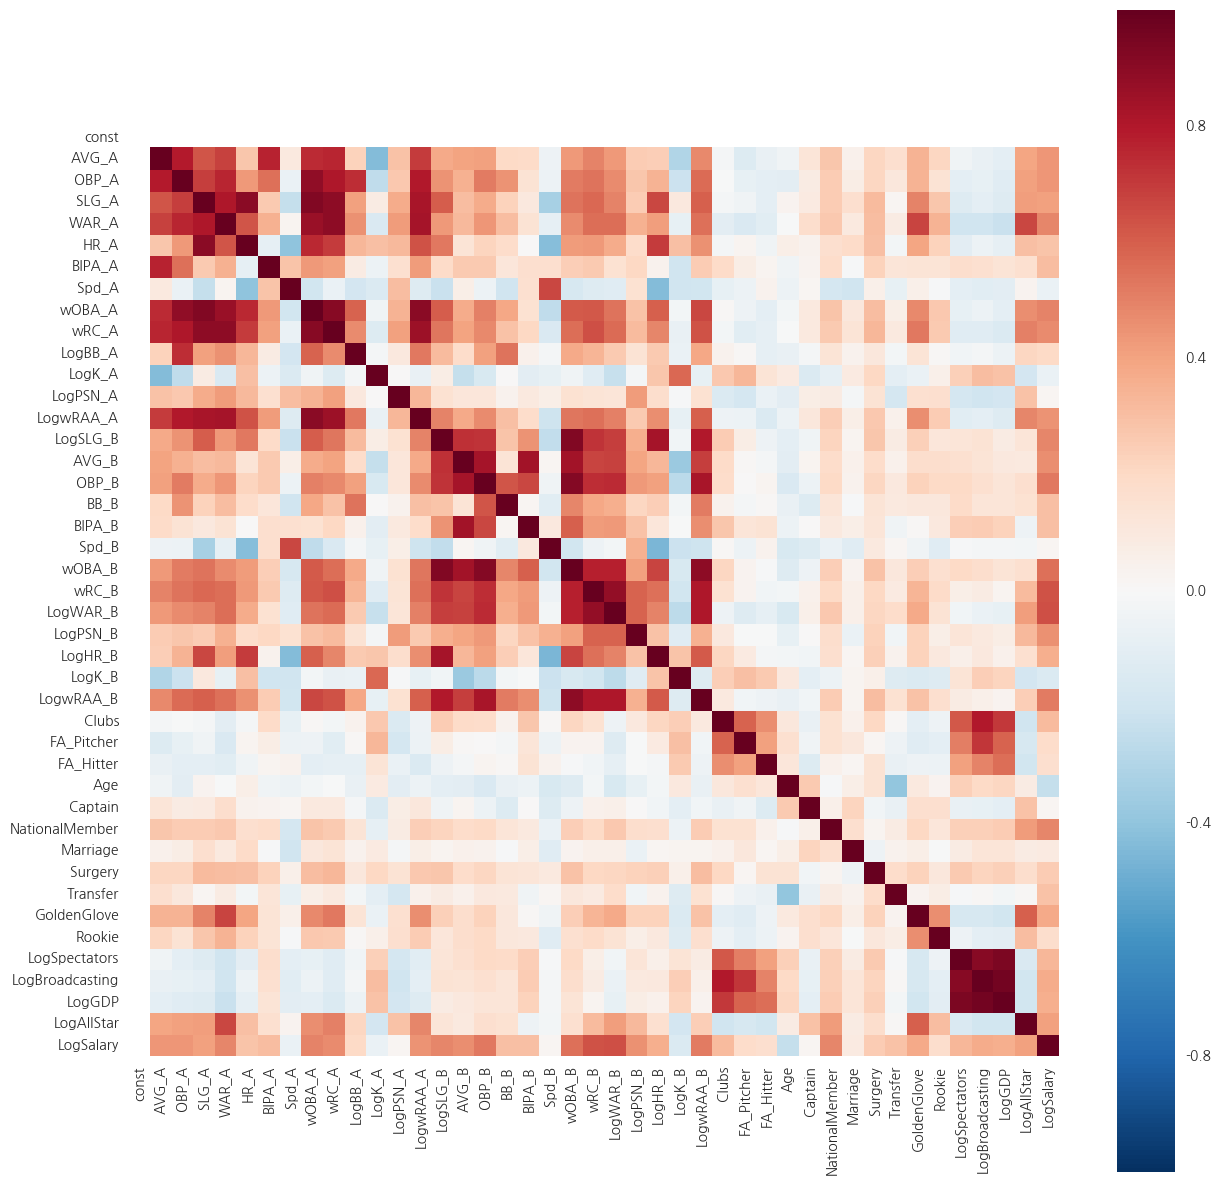

In [30]:
plt.figure(figsize=(15,15))
cormat = df_hitter1.corr()
sns.heatmap(cormat, square=True)
plt.savefig('heatmap')

In [53]:
df_hitter2 = df_hitter1.copy()

del df_hitter2["LogSpectators"]
del df_hitter2['LogBroadcasting']
del df_hitter2['Clubs']
del df_hitter2['LogAllStar']
#del df_hitter2['GoldenGlove']
del df_hitter2['Captain']
del df_hitter2['Marriage']
del df_hitter2['Rookie']
del df_hitter2['Surgery']
del df_hitter2['Transfer']
#del df_hitter2['LogGDP']
del df_hitter2['FA_Pitcher']
del df_hitter2['FA_Hitter']

del df_hitter2['LogwRAA_B']
del df_hitter2['wOBA_B']
del df_hitter2['wRC_B']
del df_hitter2['AVG_B']
del df_hitter2['LogSLG_B']
del df_hitter2['OBP_B']
del df_hitter2['Spd_B']
del df_hitter2['LogPSN_B']
del df_hitter2['LogK_B']
del df_hitter2['BIPA_B']
del df_hitter2['BB_B']
del df_hitter2['LogHR_B']
               
del df_hitter2['LogwRAA_A']
del df_hitter2['wOBA_A']
del df_hitter2['wRC_A']
del df_hitter2['AVG_A']
del df_hitter2['OBP_A']
del df_hitter2['SLG_A']
del df_hitter2['HR_A']
del df_hitter2['LogK_A']
del df_hitter2['LogBB_A']
del df_hitter2['Spd_A']
del df_hitter2['BIPA_A']
del df_hitter2['LogPSN_A']
del df_hitter2['WAR_A']




In [54]:
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     66.57
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           1.35e-32
Time:                        03:52:43   Log-Likelihood:                -32.383
No. Observations:                 123   AIC:                             76.77
Df Residuals:                     117   BIC:                             93.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.6730      1.592     -7.

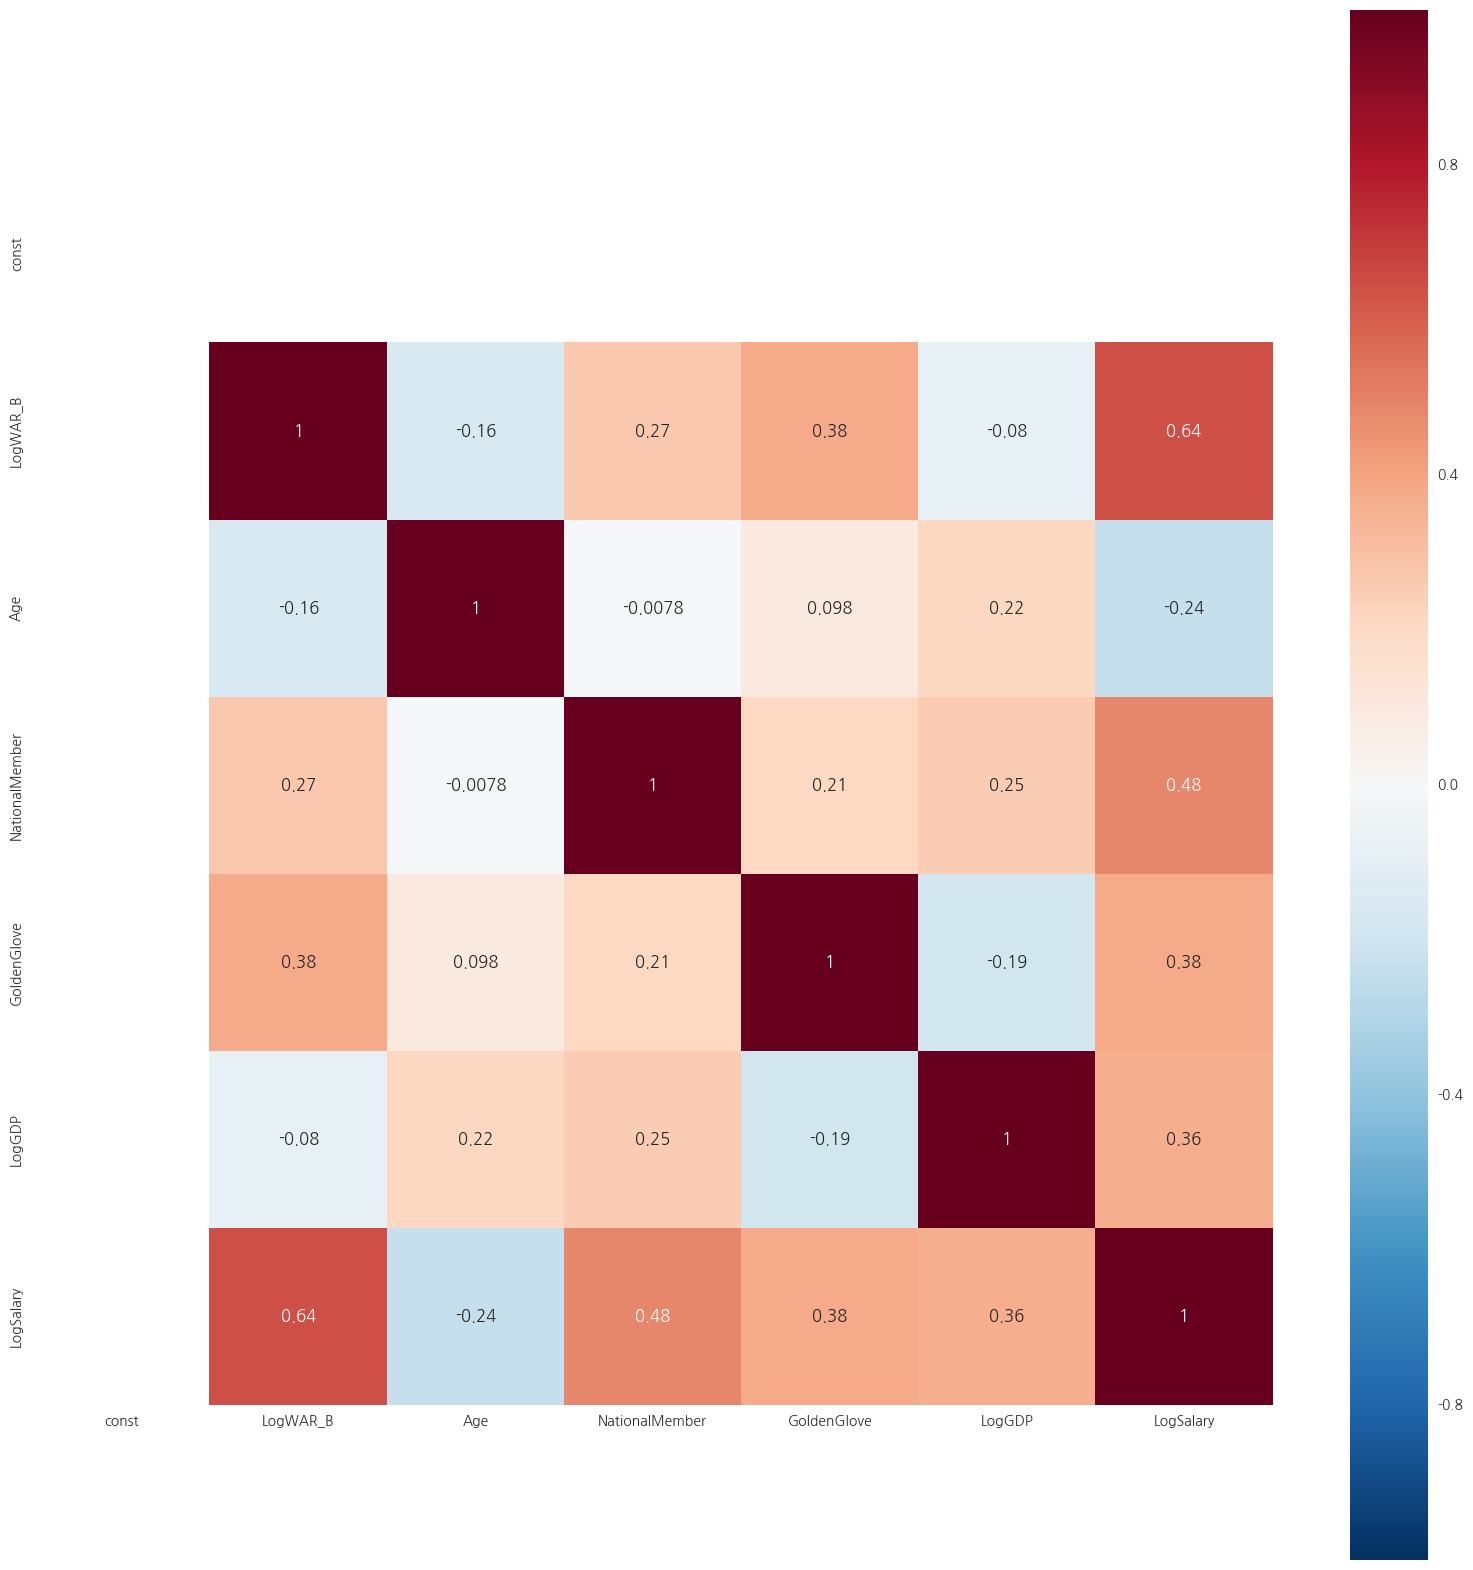

In [55]:
plt.figure(figsize=(20,20))
cormat = df_hitter2.corr()
sns.heatmap(cormat, square=True, annot=True)
plt.savefig('heatmap')

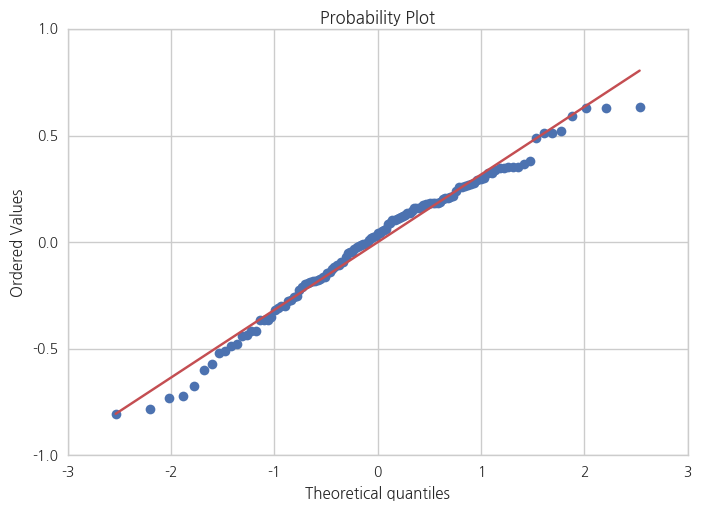

In [56]:
plt.figure()
sp.stats.probplot(result_sm2.resid, plot=plt)
plt.show()

# 아웃라이어 제거

In [57]:
influence = result_sm2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df_hitter2)-2)
idx = np.where(cooks_d2 < fox_cr)[0]
df_hitter3 = df_hitter2.ix[idx+1,:]
idx

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  88,  89,  90,  91,  92,  93,  94,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       111, 112, 114, 115, 116, 118, 119, 120, 121, 122])

In [58]:
model_sm3 = sm.OLS(df_hitter3.ix[:,-1], df_hitter3.ix[:, :-1])
result_sm3 = model_sm3.fit()
print(result_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     85.52
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           6.21e-36
Time:                        03:56:46   Log-Likelihood:                -12.138
No. Observations:                 114   AIC:                             36.28
Df Residuals:                     108   BIC:                             52.69
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.7724      1.478     -7.

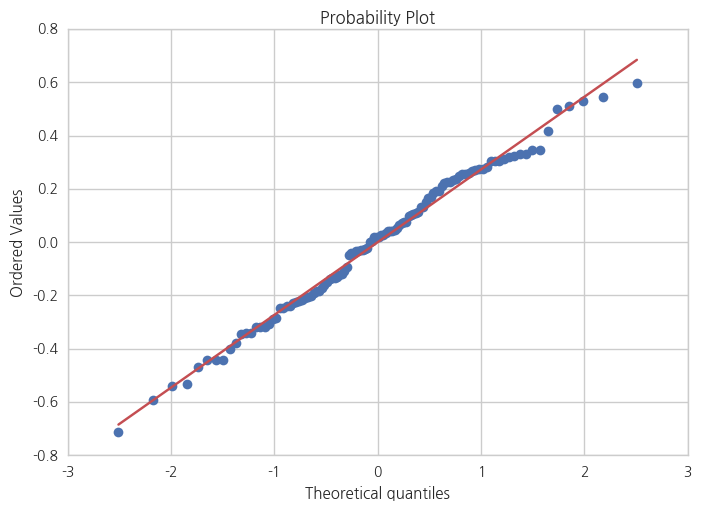

In [59]:
plt.figure()
sp.stats.probplot(result_sm3.resid, plot=plt)
plt.show()

# censored data 확인

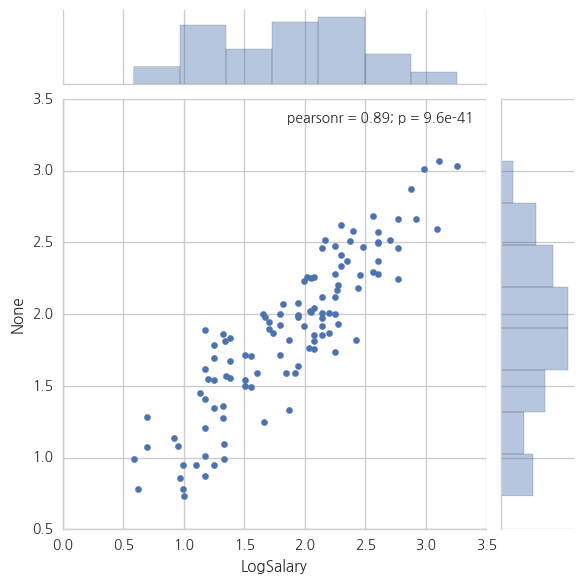

In [60]:
sns.jointplot(df_hitter3['LogSalary'], result_sm3.fittedvalues)
plt.show()

# cross validation

In [69]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv = KFold(len(df_hitter3.ix[:,:-1]),10)
a = cross_val_score(model, df_hitter3.ix[:,:-1], df_hitter3.ix[:,-1],'r2',cv)

In [70]:
a.mean()

0.71435962387669338

# Ridge

In [71]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model_Ridge = Ridge(alpha=0.1).fit(df_hitter3.ix[:,:-1],df_hitter3.ix[:,-1])
print(model_Ridge.coef_)

[ 0.          0.60789813 -0.08674182  0.26991294  0.10067464  1.02784681]


In [72]:
a=cross_val_score(model_Ridge, df_hitter3.ix[:,:-1], df_hitter3.ix[:,-1],'r2',cv)
a.mean()

0.71499247892486772

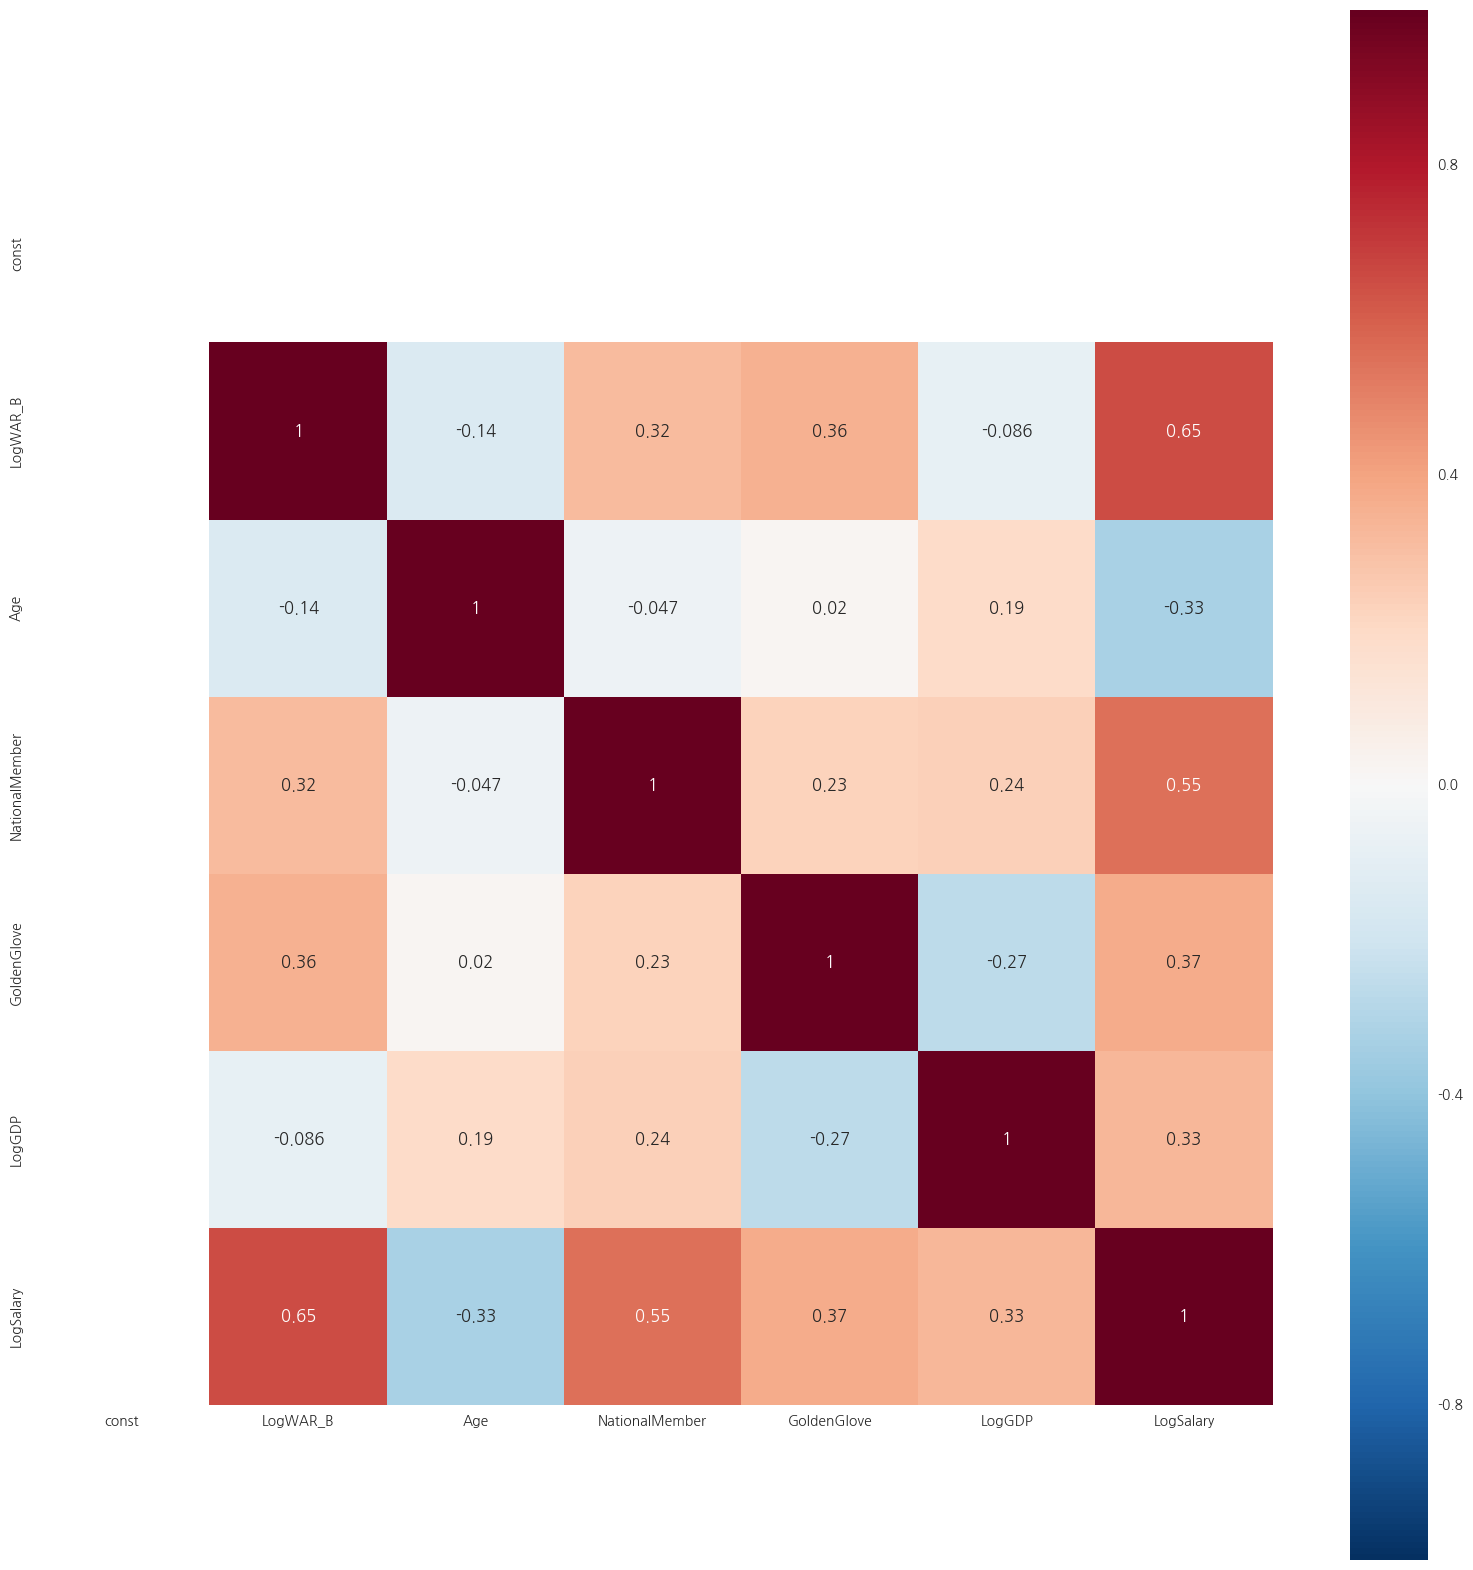

In [68]:
plt.figure(figsize=(20,20))
cormat = df_hitter3.corr()
sns.heatmap(cormat, square=True, annot=True)
plt.savefig('heatmap')

# 스케일링

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
df_hitter4 = pd.DataFrame(scaler.fit_transform(df_hitter3.ix[:,:]), columns=df_hitter3.columns[:])
df_hitter4 = sm.add_constant(df_hitter4)

In [82]:
model_sm4 = sm.OLS(df_hitter4.ix[:,-1], df_hitter4.ix[:,:-1])
result_sm4 = model_sm4.fit()
print(result_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     85.52
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           6.21e-36
Time:                        04:14:04   Log-Likelihood:                -70.487
No. Observations:                 114   AIC:                             153.0
Df Residuals:                     108   BIC:                             169.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.469e-17      0.043  -8.03e

In [76]:
model = LinearRegression()
cv = KFold(len(df_hitter4.ix[:,:-1]),10)
cross_val_score(model, df_hitter4.ix[:,:-1], df_hitter4.ix[:,-1],'r2',cv)

array([ 0.70326914,  0.67245658,  0.84195218,  0.54512382,  0.78463194,
        0.75044338,  0.6784987 ,  0.84506415,  0.68703176,  0.63512459])

In [77]:
a=cross_val_score(model, df_hitter4.ix[:,:-1], df_hitter4.ix[:,-1],'r2',cv)
a.mean()

0.7143596238766925